<font size='10'><h1 align="center"><font color='blue'>iPy oxDNA Examples</font></h1>

<center>
<img src="oxDNA.png">
</center>

<font size='10'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Duplex Melting</font></h2> 

In [3]:
from ipy_oxdna.umbrella_sampling import MeltingUmbrellaSampling
from ipy_oxdna.oxdna_simulation import SimulationManager, Simulation, Observable
from ipy_oxdna.vmmc import *

import os
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

<font size='10'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Potential Energy Umbrella Temperature Interpolation</font></h2> 

In [25]:
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/')

system_name = 'external_force_file'

conditions = ['5']

systems = [f'duplex_52_{stiff}' for stiff in conditions]

file_dirs = [f'{path}/{system_name}' for _ in range(len(systems))]


xmin = 0
xmax = 15
n_windows = 100
starting_r0 = 0.4213
stiff = 5
print_every = 1e4
temperature = '52C'
name = 'all_observables.txt'

pre_eq_steps = 5e6
eq_steps = 1e8
prod_steps = 1e9

verlet_skin = 0.5

hb_contact_filename = 'hb_contacts.txt'

com_list = ','.join('8,9,10,11,12,13,14,15'.split(',')[::-1])
ref_list = '0,1,2,3,4,5,6,7'

particle_indexes = [com_list, ref_list]
hb_contact_observable = [{'idx':particle_indexes, 'name':f'{hb_contact_filename}', 'print_every':int(print_every)}]


pre_equlibration_parameters_list = [{'backend':'CPU',"CUDA_list": "no",'use_edge': 'false','steps':f'{pre_eq_steps}','print_energy_every': f'{pre_eq_steps}',
                           'print_conf_interval':f'{pre_eq_steps}', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'T':f'{temperature}', 'verlet_skin': f'{verlet_skin}' }
                            for _ in conditions]

equlibration_parameters_list = [{'backend':'CPU',"CUDA_list": "no",'use_edge': 'false','steps':f'{eq_steps}','print_energy_every': f'{eq_steps}',
                           'print_conf_interval':f'{eq_steps/2}', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'T':f'{temperature}', 'verlet_skin': f'{verlet_skin}'}
                            for _ in conditions]

production_parameters_list = [{'backend':'CPU',"CUDA_list": "no",'use_edge': 'false','steps':f'{prod_steps}','print_energy_every': f'{prod_steps}',
                           'print_conf_interval':f'{prod_steps/2}', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'T':f'{temperature}', 'verlet_skin': f'{verlet_skin}'}
                            for _ in conditions]

us_list = [MeltingUmbrellaSampling(file_dir, sys, clean_build='force') for file_dir, sys in zip(file_dirs,systems)]
simulation_manager = SimulationManager()

In [26]:
for us, pre_equlibration_parameters in zip(us_list, pre_equlibration_parameters_list):
    print(us.system)
    us.build_pre_equlibration_runs(simulation_manager, n_windows, com_list, ref_list,
                               stiff, xmin, xmax, pre_equlibration_parameters, starting_r0, pre_eq_steps,
                               print_every=print_every, observable=True, protein=None,
                               force_file=True, continue_run=False, name=name, custom_observable=hb_contact_observable)

duplex_52_5


In [27]:
simulation_manager.run(cpu_run=True, gpu_mem_block=False)

spawning


Running: 0
Running: 1
Running: 2
Running: 3
Running: 4
Running: 5
Running: 6
Running: 7
Running: 8
Running: 9
Running: 10
Running: 11
Running: 12
Running: 13
Running: 14
Running: 15
Running: 16
Running: 17
Running: 18
Running: 19
Running: 20
Running: 21
Running: 22
Running: 23
Running: 24
Running: 25
Running: 26
Running: 27
Running: 28
Running: 29
Running: 30
Running: 31
Running: 32
Running: 33
Running: 34
Running: 35
Running: 36
Running: 37
Running: 38
Running: 39
Running: 40
Running: 41
Running: 42
Running: 43
Running: 44
Running: 45
Running: 46
Running: 47
Running: 48
Running: 49
Running: 50
Running: 51
Running: 52
Running: 53
Running: 54
Running: 55
Running: 56
Running: 57
Running: 58
Running: 59
Running: 60
Running: 61
Running: 62
Running: 63
Running: 64
Running: 65
Running: 66
Running: 67
Running: 68
Running: 69
Running: 70
Running: 71
Running: 72
Running: 73
Running: 74
Running: 75
Running: 76
Running: 77
Running: 78
Running: 79
Running: 80
Running: 81
Running: 82
Running: 83
Ru

In [34]:
for us, equlibration_parameters in zip(us_list, equlibration_parameters_list):
    print(us.system)
    us.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list,
                               stiff, xmin, xmax, equlibration_parameters, print_every=print_every,
                               observable=True, protein=None, force_file=True, continue_run=False, name=name, custom_observable=hb_contact_observable)

duplex_52_5


In [35]:
simulation_manager.run(cpu_run=True, gpu_mem_block=False)

spawning


Running: 0
Running: 1
Running: 2
Running: 3
Running: 4
Running: 5
Running: 6
Running: 7
Running: 8
Running: 9
Running: 10
Running: 11
Running: 12
Running: 13
Running: 14
Running: 15
Running: 16
Running: 17
Running: 18
Running: 19
Running: 20
Running: 21
Running: 22
Running: 23
Running: 24
Running: 25
Running: 26
Running: 27
Running: 28
Running: 29
Running: 30
Running: 31
Running: 32
Running: 33
Running: 34
Running: 35
Running: 36
Running: 37
Running: 38
Running: 39
Running: 40
Running: 41
Running: 42
Running: 43
Running: 44
Running: 45
Running: 46
Running: 47
Running: 48
Running: 49
Running: 50
Running: 51
Running: 52
Running: 53
Running: 54
Running: 55
Running: 56
Running: 57
Running: 58
Running: 59
Running: 60
Running: 61
Running: 62
Running: 63
Running: 64
Running: 65
Running: 66
Running: 67
Running: 68
Running: 69
Running: 70
Running: 71
Running: 72
Running: 73
Running: 74
Running: 75
Running: 76
Running: 77
Running: 78
Running: 79
Running: 80
Running: 81
Running: 82
Running: 83
Ru

In [59]:
for us, production_parameters in zip(us_list, production_parameters_list):
    print(us.system)
    us.build_production_runs(simulation_manager, n_windows, com_list, ref_list,
                             stiff, xmin, xmax, production_parameters,
                             observable=True, print_every=print_every ,protein=None,
                             force_file=True, continue_run=False, name=name, custom_observable=hb_contact_observable)

duplex_52_5


In [60]:
simulation_manager.run(cpu_run=True, gpu_mem_block=False)

spawning


Running: 0
Running: 1
Running: 2
Running: 3
Running: 4
Running: 5
Running: 6
Running: 7
Running: 8
Running: 9
Running: 10
Running: 11
Running: 12
Running: 13
Running: 14
Running: 15
Running: 16
Running: 17
Running: 18
Running: 19
Running: 20
Running: 21
Running: 22
Running: 23
Running: 24
Running: 25
Running: 26
Running: 27
Running: 28
Running: 29
Running: 30
Running: 31
Running: 32
Running: 33
Running: 34
Running: 35
Running: 36
Running: 37
Running: 38
Running: 39
Running: 40
Running: 41
Running: 42
Running: 43
Running: 44
Running: 45
Running: 46
Running: 47
Running: 48
Running: 49
Running: 50
Running: 51
Running: 52
Running: 53
Running: 54
Running: 55
Running: 56
Running: 57
Running: 58
Running: 59
Running: 60
Running: 61
Running: 62
Running: 63
Running: 64
Running: 65
Running: 66
Running: 67
Running: 68
Running: 69
Running: 70
Running: 71
Running: 72
Running: 73
Running: 74
Running: 75
Running: 76
Running: 77
Running: 78
Running: 79
Running: 80
Running: 81
Running: 82
Running: 83
Ru

In [68]:
for us in us_list:
    us.observables_list = []
    us.com_distance_observable(com_list, ref_list, print_every=print_every, name=name)
    us.hb_list_observable(print_every=print_every, only_count='true', name=name)
    us.force_energy_observable(print_every=print_every, name=name)
    us.kinetic_energy_observable(print_every=print_every, name=name)
    us.potential_energy_observable(print_every=print_every, name=name)

all_observables = []
for us in us_list:
    all_observables.append(us.analysis.read_all_observables('prod'))

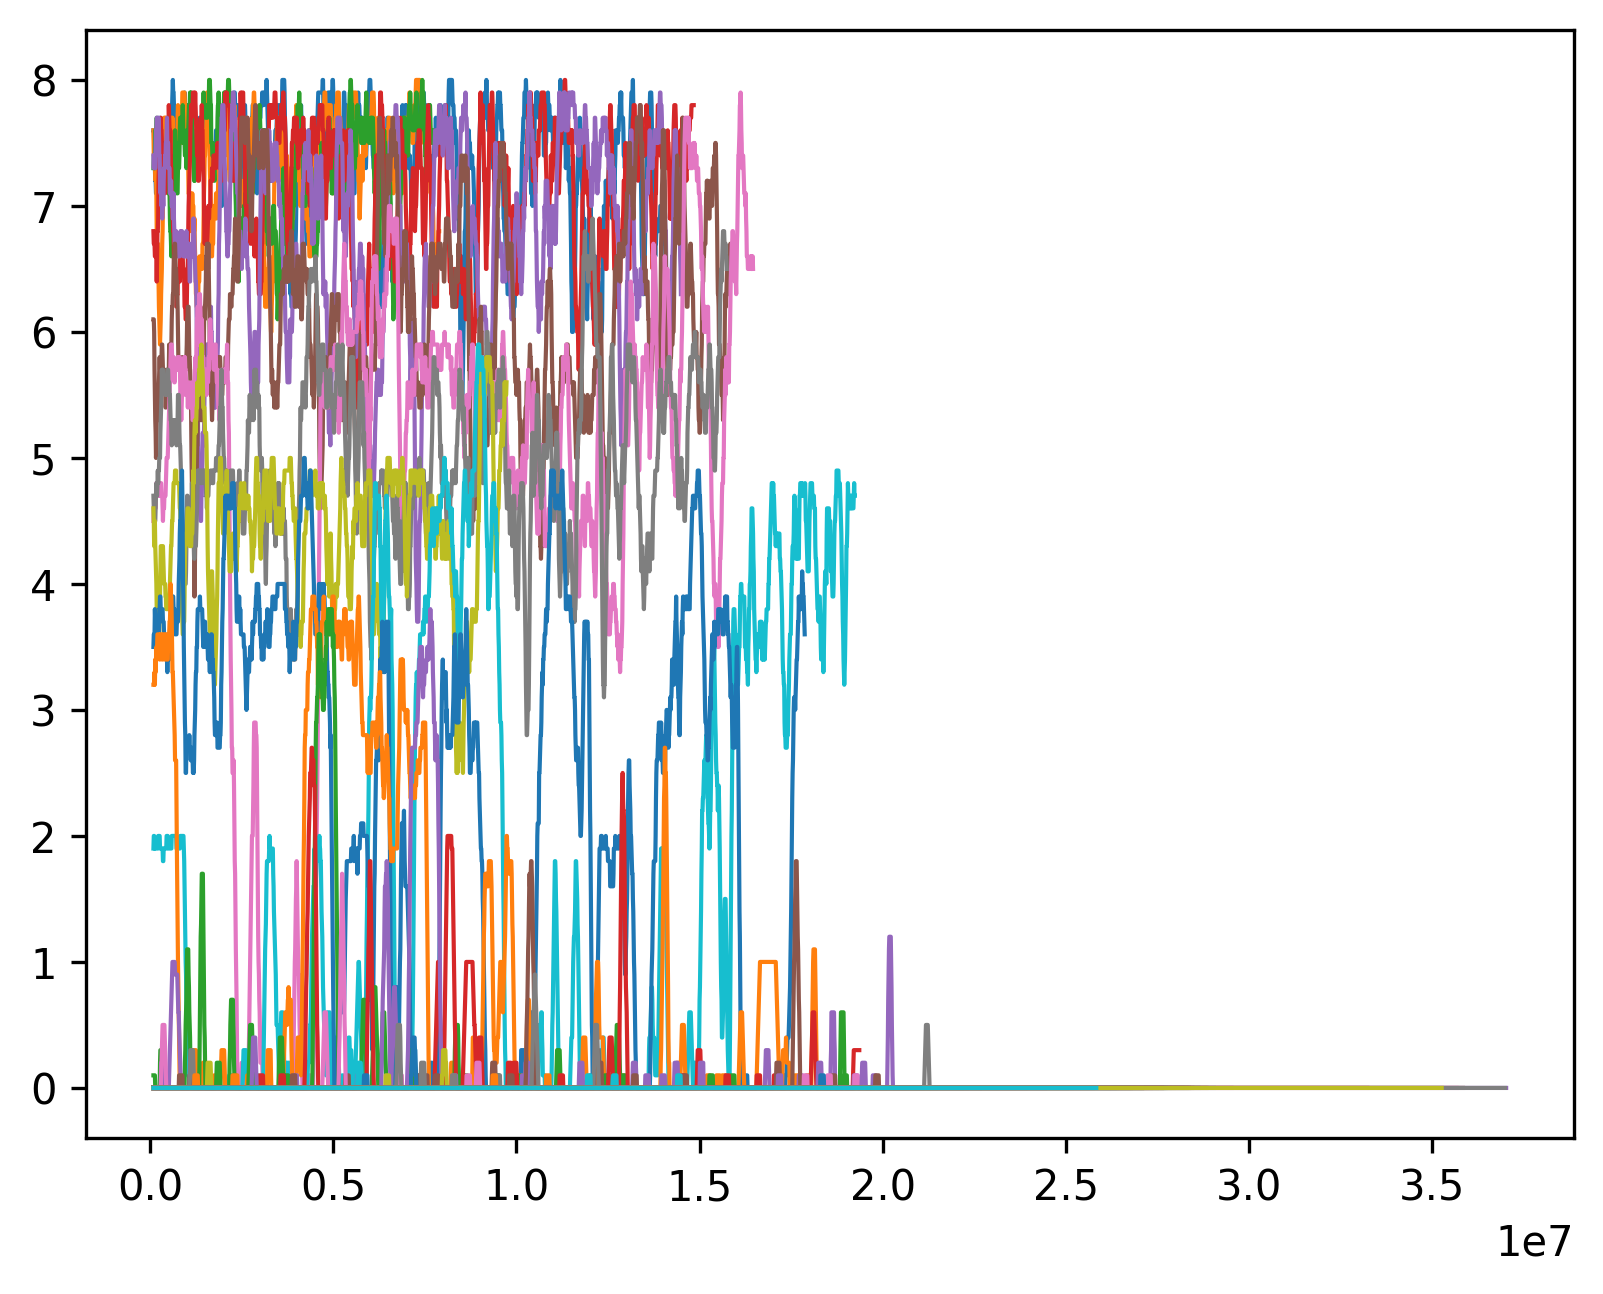

In [69]:
names = ['backbone', 'bonded_excluded_volume', 'stacking', 'nonbonded_excluded_volume', 'hydrogen_bonding', 'cross_stacking', 'coaxial_stacking', 'debye_huckel']
columns = ['com_distance', 'hb_list', 'force_energy', *names]

my_obs = all_observables[0]

fig, ax = plt.subplots(dpi=300)
for idx, obs in enumerate(my_obs):
    plt.plot(obs['steps'], obs['hb_list'].rolling(window=10).mean(), label=f'{idx}', linewidth=1)
# plt.legend(fontsize=1)

(-0.05, 1.0)

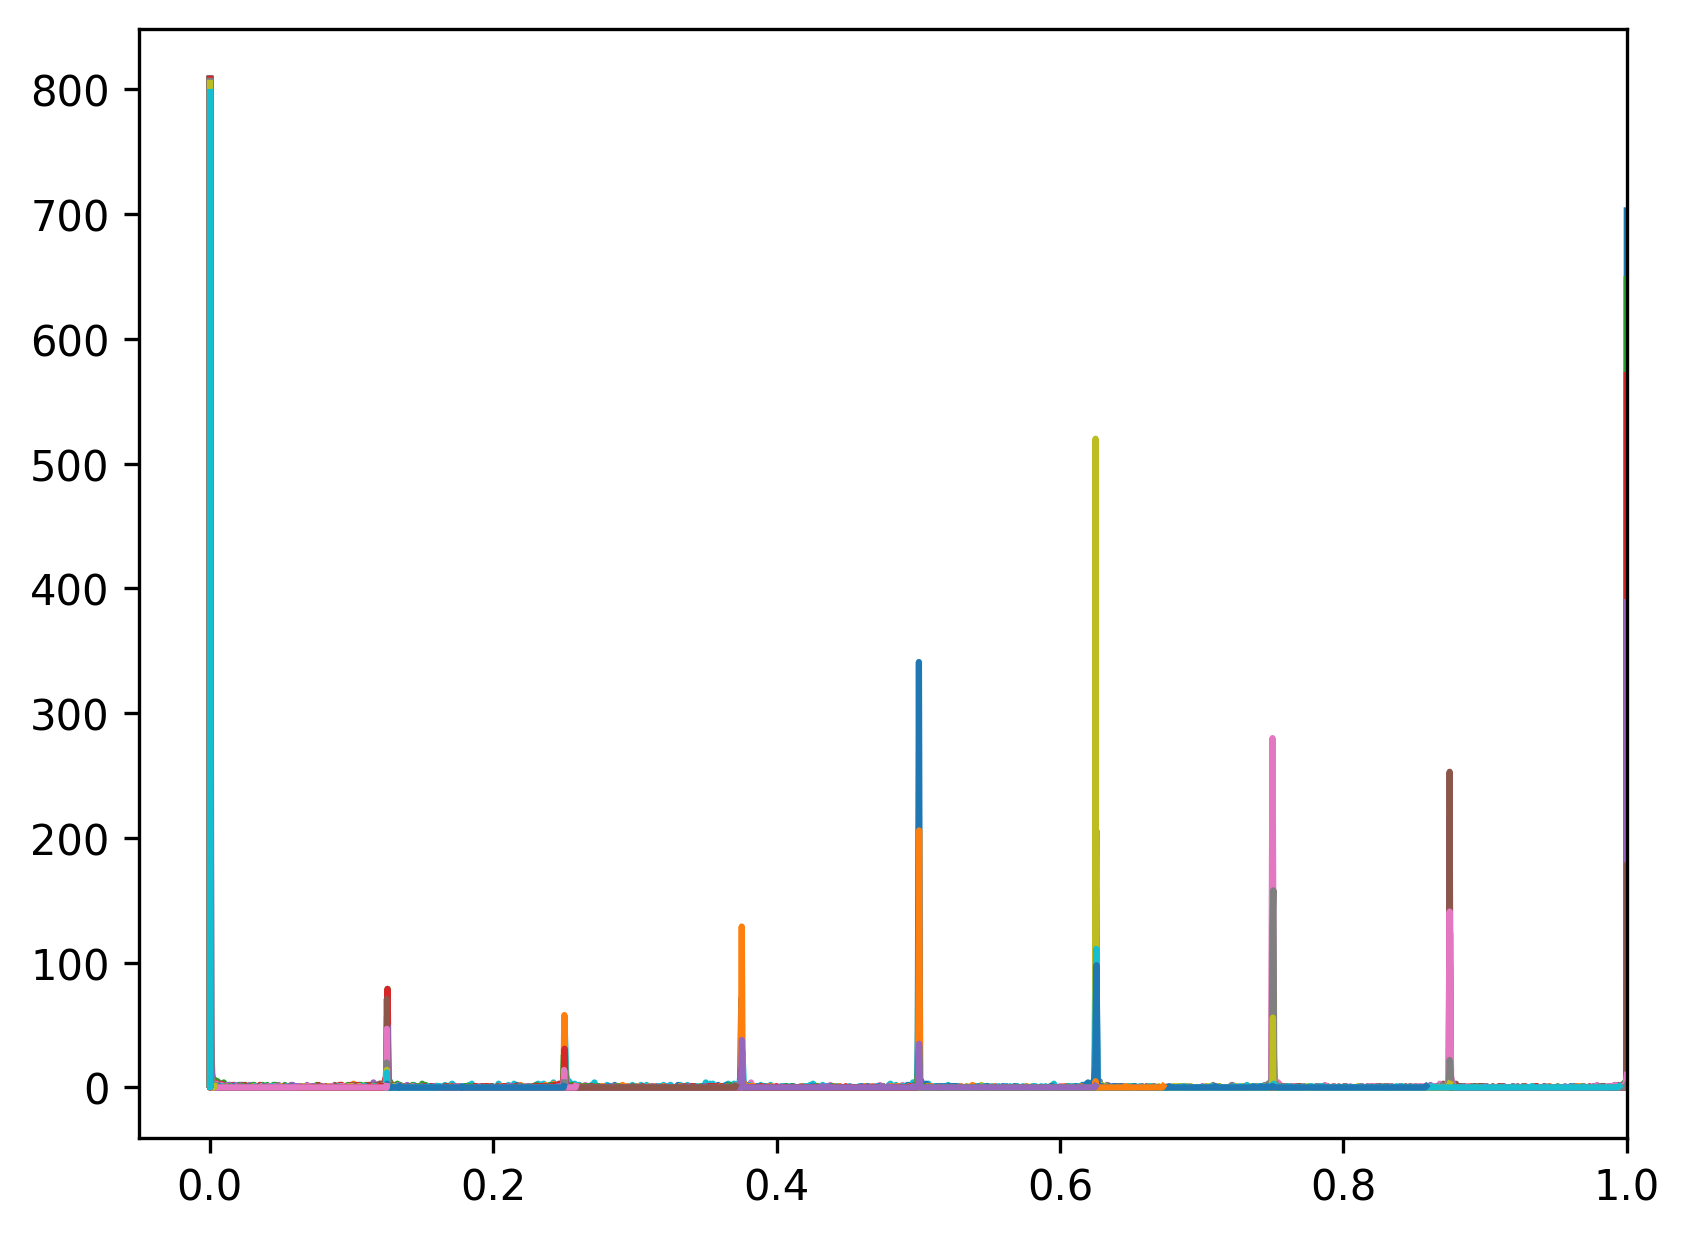

In [70]:
us_list[0].read_hb_contacts(sim_type='prod')

min_len = min([len(inner_list) for inner_list in us_list[0].hb_contacts_by_window.values()])
truncated_hb_contacts_by_window = np.array([value[:min_len] for value in us_list[0].hb_contacts_by_window.values()]).squeeze()

fig, ax = plt.subplots(dpi=300)
for hb_contacts in truncated_hb_contacts_by_window:
    
    H, bins = np.histogram(hb_contacts, bins=1000)
    ax.plot(bins[1:], H)
ax.set_xlim(-0.05, 1)

In [ ]:
for sim in us_list[0].pre_equlibration_sims[::5]:
    sim.analysis.view_last()

In [71]:
xmin = 0
xmax = 15
# temp_range = np.linspace(45, 65, 41)
temp_range = np.array([52])
# temp_range = np.array([20, 30, 40, 45, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 70, 80])
n_bins = 1000
max_hb = 8
epsilon = 1e-6
convergence_slice = 1

us_list[0].wham_cont_and_disc_temp_interp_converg_analysis(convergence_slice, temp_range,
                                                           n_bins, xmin, xmax,max_hb,
                                                           epsilon=epsilon, reread_files=False,
                                                           all_observables=True)

AttributeError: 'MeltingUmbrellaSampling' object has no attribute 'com_dir'

In [74]:
wham_dir = os.path.abspath('/scratch/mlsample/ipy_oxDNA/wham/wham')
n_bins = '400'
tol = '1e-12'
n_boot = '0'


xmin = [0]
xmax = [15]
n_windows = 100
stiff = 5
print_every = 1e4
temperature = '52C'
name = 'all_observables.txt'

pre_eq_steps = 1e6
eq_steps = 1e8
prod_steps = 1e9

for us in us_list:
    us.observables_list = []
    us.com_distance_observable(com_list, ref_list, print_every=print_every, name=name)
    us.hb_list_observable(print_every=print_every, only_count='true', name=name)
    us.force_energy_observable(print_every=print_every, name=name)
    us.potential_energy_observable(print_every=print_every, name=name)

for us, xmi, xma  in zip(us_list, xmin, xmax):
    us.wham_run(wham_dir, xmi, xma, stiff, n_bins, tol, n_boot, all_observables=True)
    
n_chunks = 2
data_added_per_iteration = 2

for us, xmi, xma  in zip(us_list, xmin, xmax):
    us.wham.get_n_data_per_com_file()
    us.convergence_analysis(n_chunks, data_added_per_iteration, wham_dir, xmin, xmax, stiff, n_bins, tol, n_boot)

Running WHAM analysis...


In [ ]:
for us in us_list:
    us.wham.plot_truncated_free_energy()
    plt.legend()
    plt.title(us.system)
    us.wham.plot_chunks_free_energy()
    plt.legend()
    plt.title(us.system)

<font size='7'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Initalize Vmmc Replicas</font></h2> 

In [ ]:
path = os.path.abspath('/scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples')
systems = ['duplex_melting']

file_dir_list = [f'{path}/{sys}' for sys in systems]
sim_dir_list = [f'{file_dir}/vmmc_melting_replicas/vmmc_melting_rep' for sys, file_dir in zip(systems, file_dir_list)]

n_replicas = 40
vmmc_replica_generator = VmmcReplicas()

vmmc_replica_generator.multisystem_replica(
    systems,
    n_replicas,
    file_dir_list,
    sim_dir_list
)
vmmc_sim_list = vmmc_replica_generator.sim_list
queue_of_simulations = vmmc_replica_generator.queue_of_sims

p1 = '15,14,13,12,11,10,9,8'
p2 = '0,1,2,3,4,5,6,7'
pre_defined_weights = [8, 16204, 1882.94, 359.746, 52.5898, 15.0591, 7.21252, 2.2498, 2.89783]

sim_parameters = {'T':'52C', 'steps':'1e9','print_energy_every': '1e5','print_conf_interval':'1e6'}

In [ ]:
vmmc_sim_list[0].analysis.read_vmmc_op_data()
vmmc_sim_list[0].analysis.calculate_sampling_and_probabilities()

In [ ]:
with plt.style.context(['science', 'no-latex', 'bright']):
    ax = us.wham.plt_fig() 
    vmmc_replica_generator.plot_mean_free_energy_with_error_bars(num_bins=500, ax=ax, confidence_level=0.95, label='VMMC discrete made continuous 52C')
    # us_1.wham.plot_free_energy(confidence_level=0.99, ax=ax, errorevery=10, label='Continuous umbrella sampling 52C all bonds')
    us.wham.plot_free_energy(confidence_level=0.99, ax=ax, errorevery=10, label='Continuos umbrella sampling 52C only intended bonds')
    ax.set_xlim(-0.1,8)
    plt.ylim(-0.1,9)
plt.legend(fontsize=6)

In [ ]:
with plt.style.context(['science', 'no-latex', 'bright']):
    ax = us.wham.plt_fig() 
    # vmmc_replica_generator.plot_mean_free_energy_with_error_bars(num_bins=500, ax=ax, confidence_level=0.95, label='VMMC discrete made continuous 52C')
    us_1.wham.plot_free_energy(confidence_level=0.99, ax=ax, errorevery=10, label='Continuous umbrella sampling 52C all bonds')
    us.wham.plot_free_energy(confidence_level=0.99, ax=ax, errorevery=10, label='Continuos umbrella sampling 52C only intended bonds')
    # ax.set_xlim(-0.1,8)
    # plt.ylim(-0.1,9)
plt.legend(fontsize=6)